# Local time correlation

In [2]:
from RandomLoop import StateSpace
import numpy as np
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm

In [21]:
m = StateSpace(3, 64, 12)
m.step(1_000_000)
m.step(10_000_000, sample_rate=1_000, observables=[m.local_time_corr])

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

In [22]:
data_12 = np.transpose(np.array(m.data['local_time_corr']), axes = (1, 2, 0))

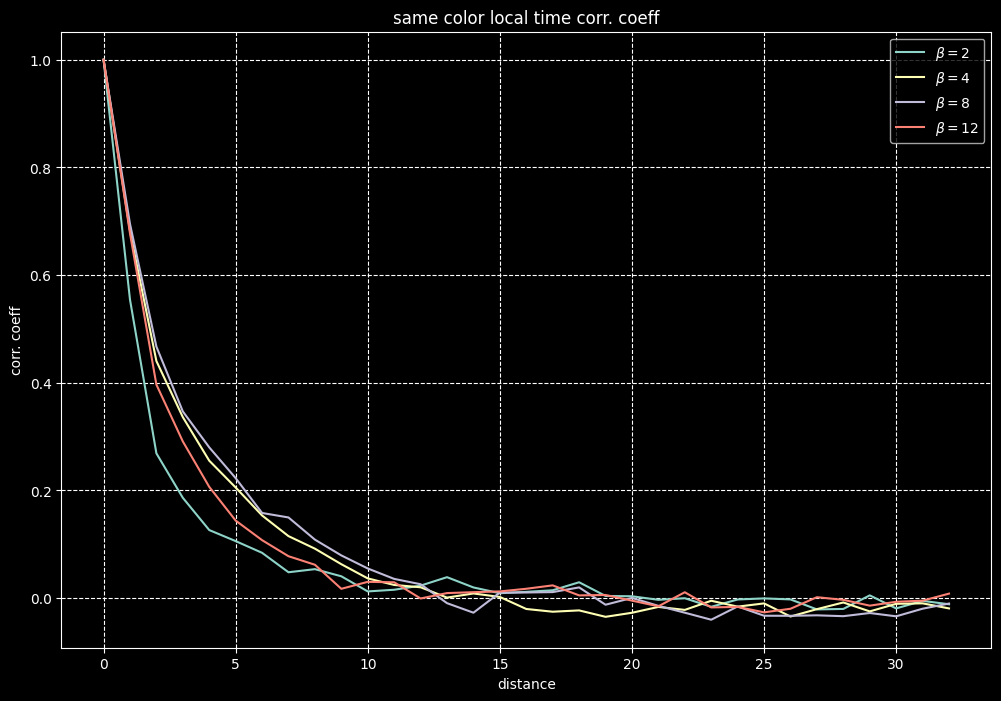

In [23]:
def get_corrs(data):
    corr = []
    for i in range(33):
        X = data[i, 0, :]
        Y = data[i, 1, :]
        corr.append( np.corrcoef(X, Y)[0,1] )
    return corr
    
plt.figure(figsize=(12,8))
plt.plot(get_corrs(data_2), label=r'$\beta = 2$')
plt.plot(get_corrs(data_4), label=r'$\beta = 4$')
plt.plot(get_corrs(data_8), label=r'$\beta = 8$')
plt.plot(get_corrs(data_12), label=r'$\beta = 12$')
plt.title('same color local time corr. coeff')
plt.xlabel('distance')
plt.ylabel('corr. coeff')
plt.grid(linestyle='--')
plt.legend()

Text(0.5, 1.0, 'diff color corr')

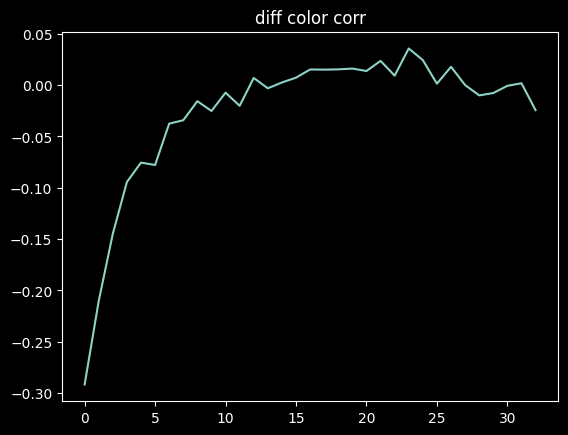

In [4]:
covs = []
for i in range(33):
    X = data[i, 0, :]
    Y = data[i, 1, :]
    covs.append( np.corrcoef(X, Y)[0,1] )
    
plt.plot(covs)
plt.title('diff color corr')

# Boundary condition

In [30]:
sizes = np.arange(8, 64, 8)
mags = []
for s in tqdm(sizes):
    m = StateSpace(3, s, 20, bc=0)
    m.step(1_000_000, progress_bar=False)

    observables = {
        'mag': lambda: m.get_local_time_i(0, s // 2, s // 2) / m.get_local_time(s // 2, s // 2) - 1/3
    }

    m.step(1_000_000, sample_rate=100, observables=observables, progress_bar=False)
    
    mags.append( np.mean(m.data['mag']) )
    


  0%|          | 0/7 [00:00<?, ?it/s]

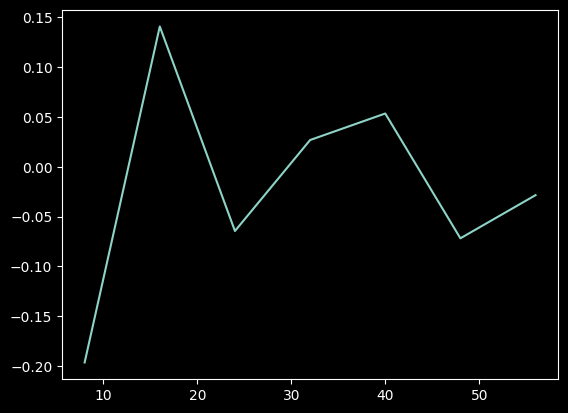

In [32]:
plt.plot(np.arange(8, 64, 8), mags)

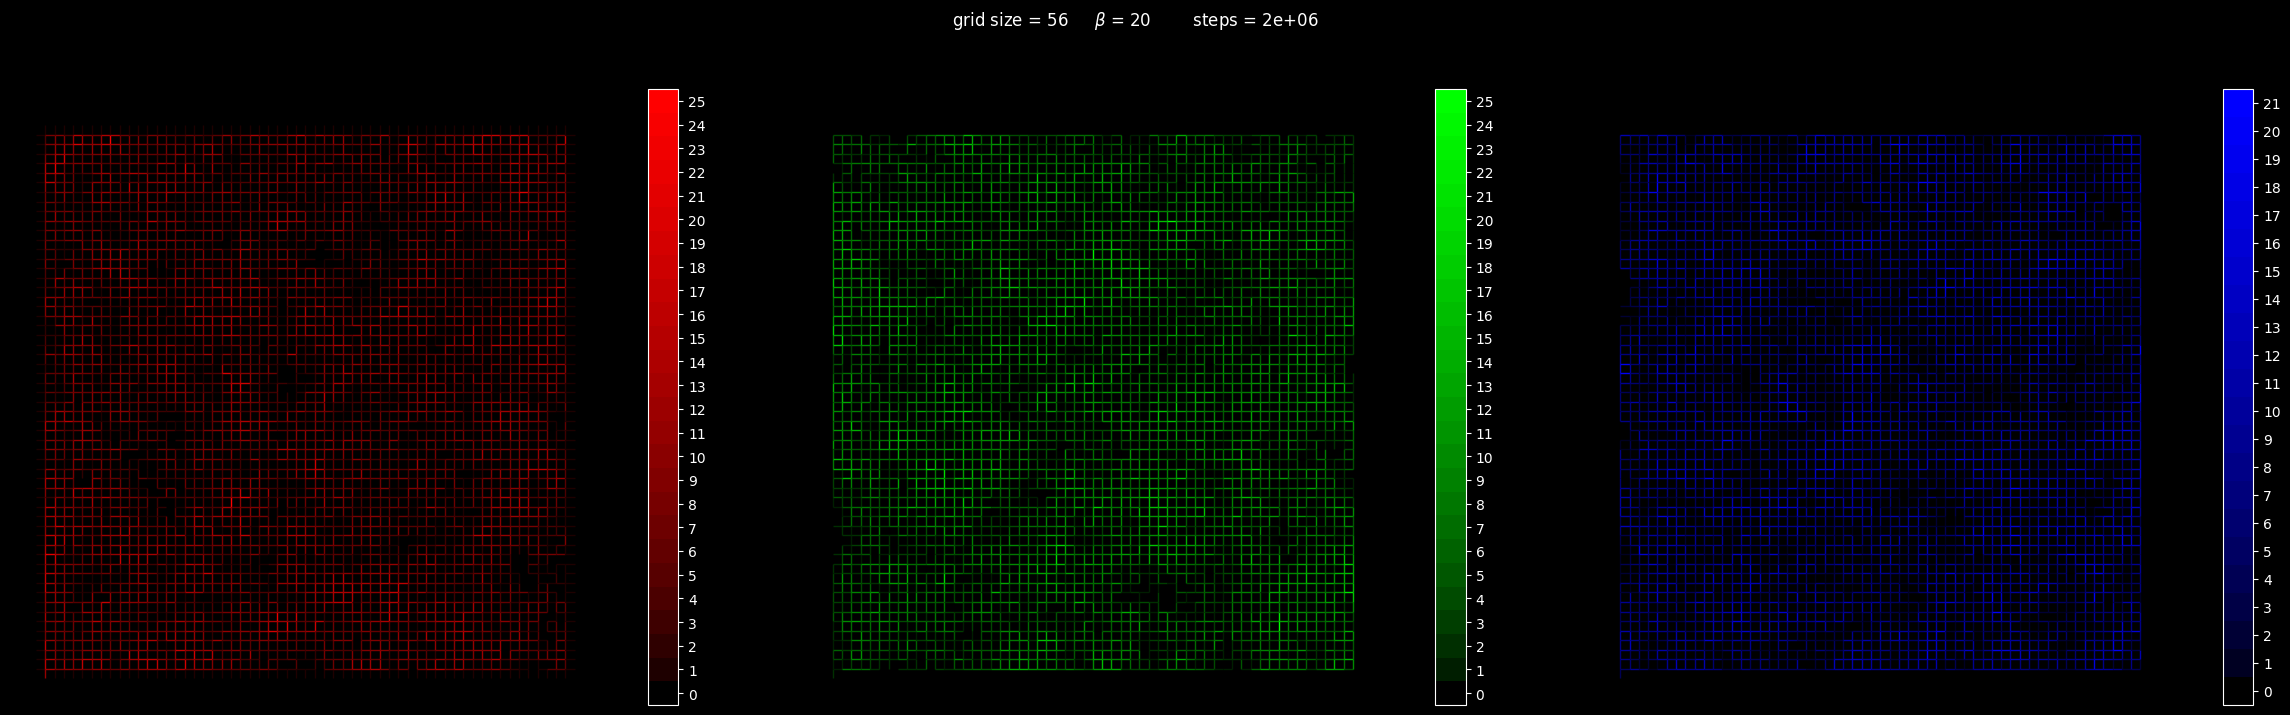

In [22]:
m.plot_grid()

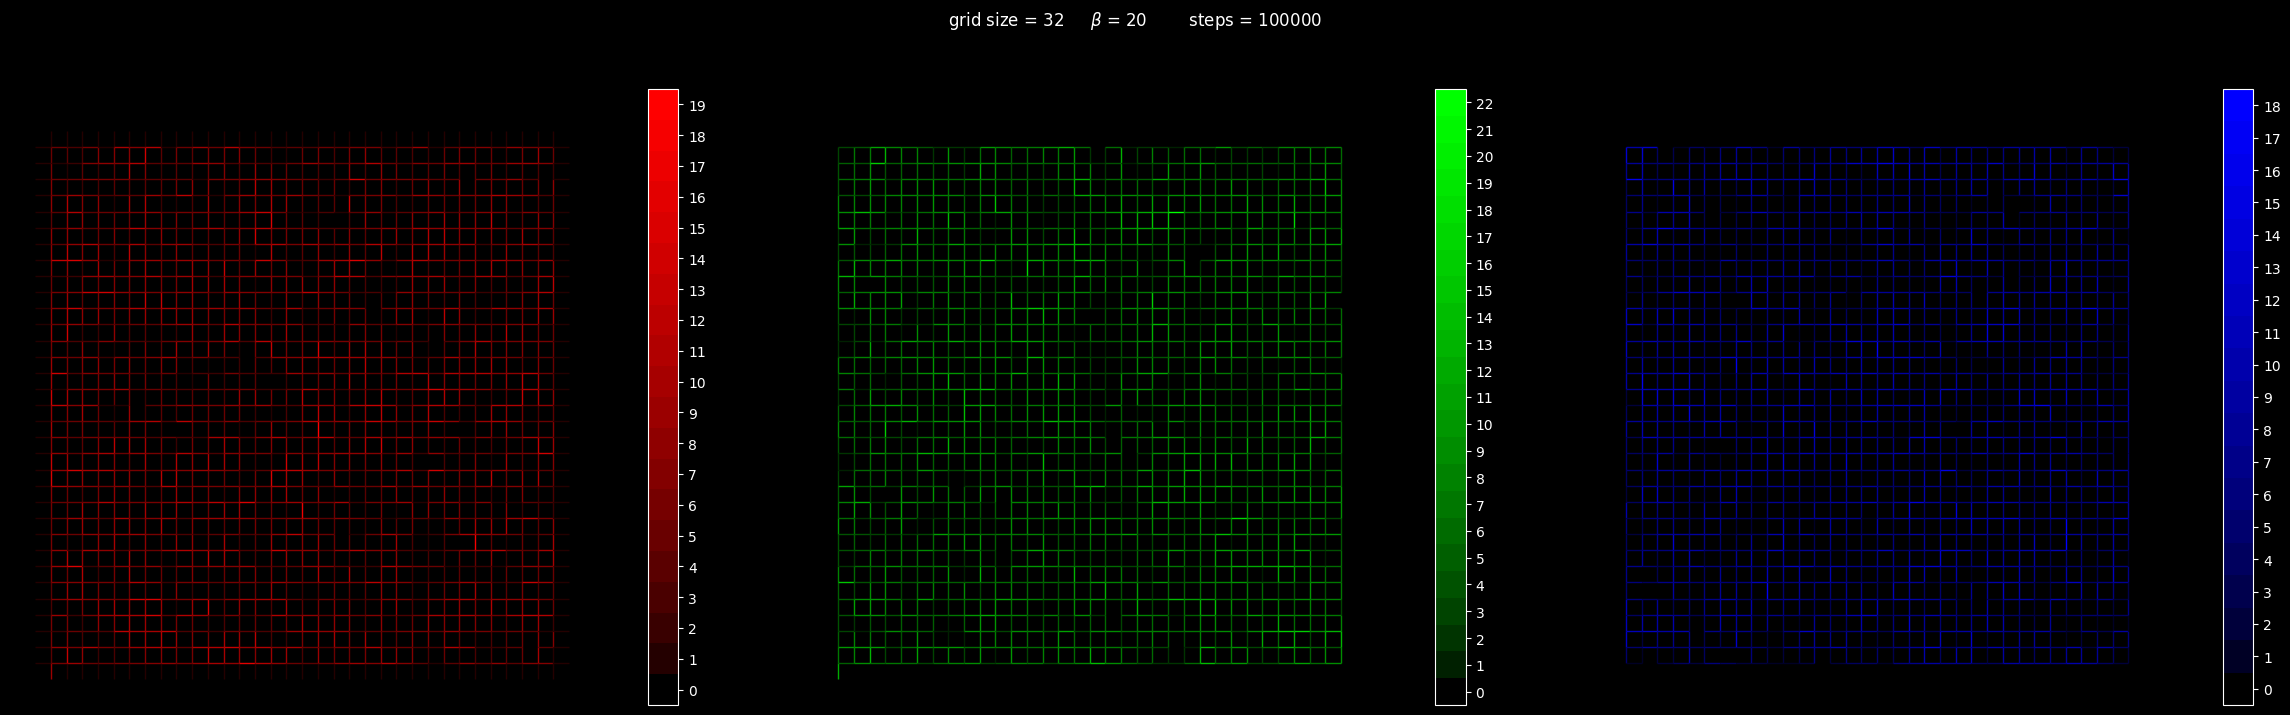

In [29]:
m = StateSpace(3, 32, 20, bc=0)
m.step(100_000, progress_bar=False)
m.plot_grid()